## `CROSS SELL PREDICTION - AV`

### `STEP 1: IMPORT LIBRARIES`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### `STEP 2: IMPORT DATASET`

In [2]:
train_data = pd.read_csv('train.csv')

test_data  = pd.read_csv('test.csv')

print("Data Imported Successfully")

Data Imported Successfully


### `STEP 3: EXPLORTORY DATA ANALYSIS / DATA MINING / DATA CLEANING`

In [3]:
# Checking Shape

train_data.shape

(381109, 12)

In [4]:
#  Checking Top Records

train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# Cheking Null Values

train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

> > __`VARIABLE IDENTIFICATION`__

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Summary:

   - We need to convert our target variable - __`Response`__ into object category.
   
   
   - Also we need to __`Region_Code`__ into integer.

In [7]:
# train_data['Response'] = train_data['Response'].astype('object')

train_data['Region_Code'] = train_data['Region_Code'].astype('int64')
test_data['Region_Code'] = test_data['Region_Code'].astype('int64')

<br>

> > __`UNIVARIANT ANALYSIS`__

#### `RESPONSE`

Nos of Responses
0    334399
1     46710
Name: Response, dtype: int64


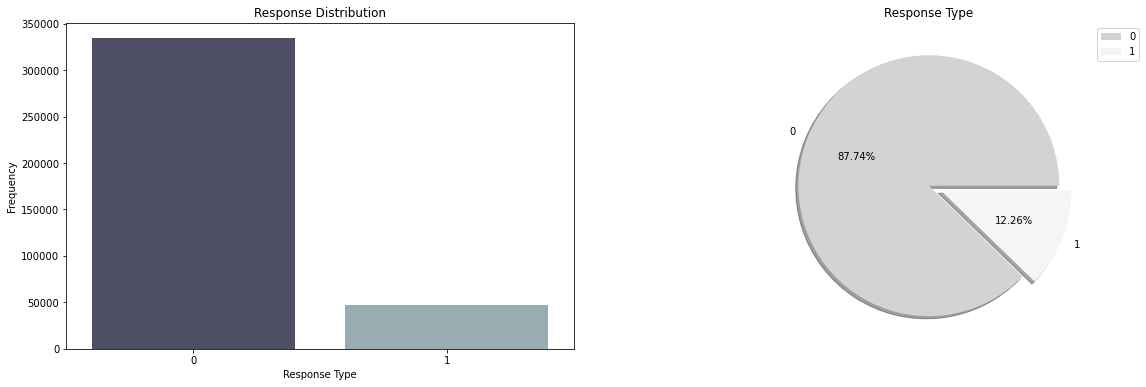

In [8]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print("Nos of Responses")
print(train_data['Response'].value_counts())

sns.countplot(x = train_data['Response'],
              data = train_data,
              palette = 'bone')
plt.title('Response Distribution')
plt.xlabel('Response Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['0', '1']
size = train_data['Response'].value_counts()
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Response Type')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

Summary:
    
    1) Overall 87% from the datset tells us that customers where not intrested in Vehicle Insurance
    
    2) We recored very low respose those who favor for Vehicle Insurance.

#### `GENDER`

Nos of Males and Females:
Male      206089
Female    175020
Name: Gender, dtype: int64


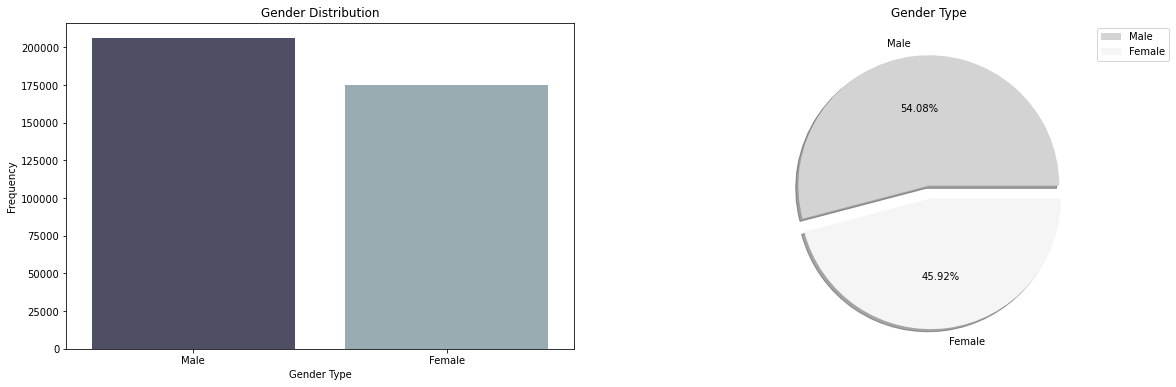

In [9]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print("Nos of Males and Females:")
print(train_data['Gender'].value_counts())

sns.countplot(x = train_data['Gender'],
              data = train_data,
              palette = 'bone')
plt.title('Gender Distribution')
plt.xlabel('Gender Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['Male', 'Female']
size = train_data['Gender'].value_counts()
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender Type')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

Summary:
    
     1)  In our dataset 54 % (2 lack) accounted Males and 46 % (1.75 lack) Females.
    
     2)  We can further analyze in bivariant analysis as to which gender accounted more for vehicle assurance.

#### `GENERATION`

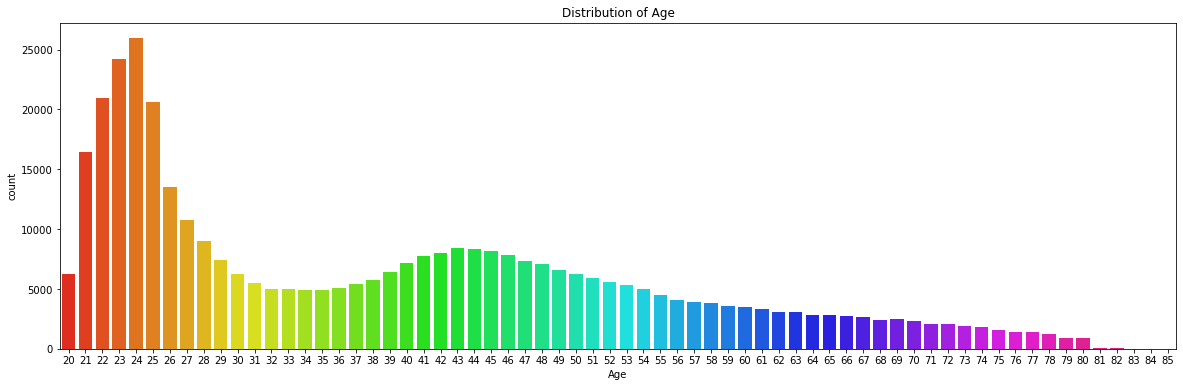

In [10]:
plt.figure(figsize = (20,6))

sns.countplot(train_data['Age'], palette = 'hsv')
plt.title('Distribution of Age')
plt.show()

Summary :
    
    1) Age Distribution looked to be right skewed. 
    
    2) Min range of age was 20 and Maximum was 85.
    
    3) Most of the generation are between 20-30 years of age and we see a rising fall after the age of 45. 

#### `DRIVING LICENSE`

Driving License - Yes/No
1    380297
0       812
Name: Driving_License, dtype: int64


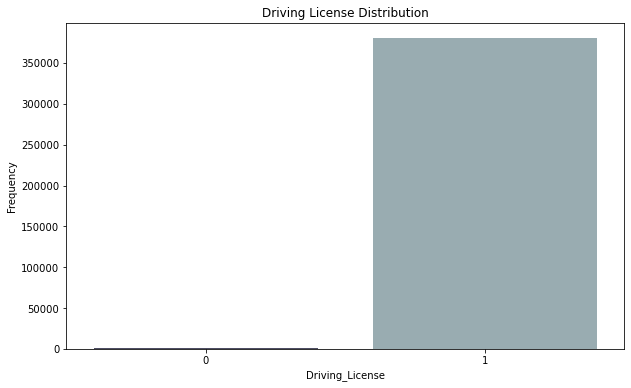

In [11]:
plt.figure(figsize = (10,6))

print("Driving License - Yes/No")
print(train_data['Driving_License'].value_counts())

sns.countplot(x = train_data['Driving_License'],
              data = train_data,
              palette = 'bone')
plt.title('Driving License Distribution')
plt.ylabel('Frequency')
plt.show()

Summary: 
    
    1) 99% of customers had driving license where 1% of customers falls under the bracket of not having driving licence.
    
    2) We can further analyze in bivariant analysis  and derive more insights.

#### `REGION CODE`

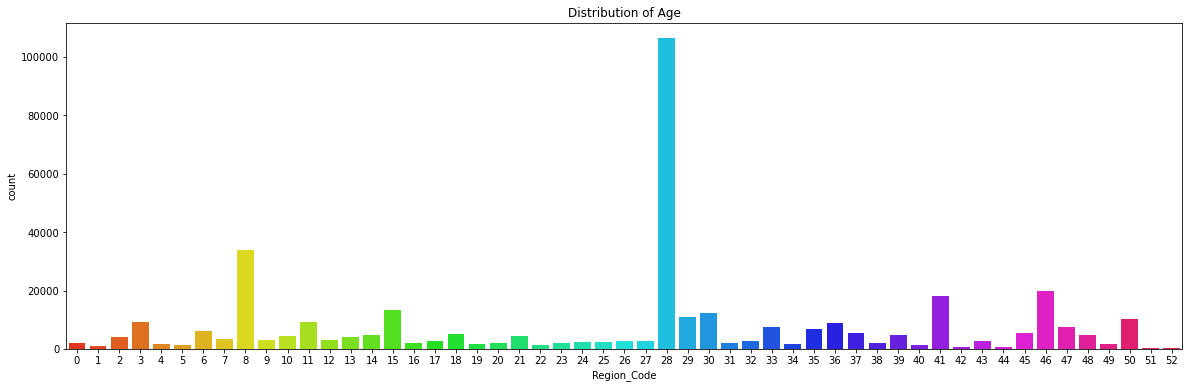

In [12]:
plt.figure(figsize = (20,6))

sns.countplot(train_data['Region_Code'], palette = 'hsv')
plt.title('Distribution of Age')
plt.show()

Summary:
    
    1) Highest number of customers where coming from region 28 followed by 8 , 46 and 41.
    
    2) Rest of the region codes showed very less, less customers as compared to above.
    
    3) We can further analyze in bivariant analysis.

#### `PREVIOUSLY INSURED`

Previously Insured Count:
0    206481
1    174628
Name: Previously_Insured, dtype: int64


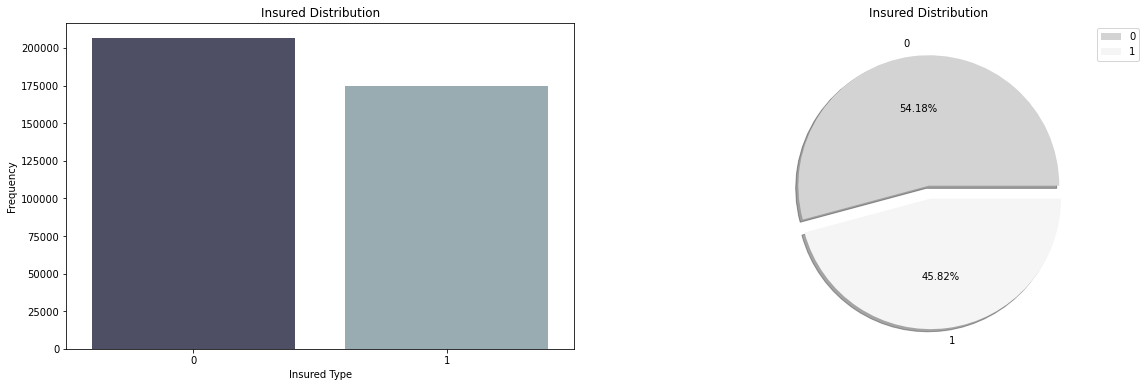

In [13]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print("Previously Insured Count:")
print(train_data['Previously_Insured'].value_counts())

sns.countplot(x = train_data['Previously_Insured'],
              data = train_data,
              palette = 'bone')
plt.title('Insured Distribution')
plt.xlabel('Insured Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['0', '1']
size = train_data['Previously_Insured'].value_counts()
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Insured Distribution')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))


plt.show()

Summary: 
    
    1) We can see that 54 % (2 Lacks) did not had insurance where as 45 % (1.75 Lacks) of customers had insurance.
   
   
    2) We can analyze later what was the response of the customers having insurance, having insurance & driving license.

#### `VEHICLE AGE`

Vehicle Age Count:
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


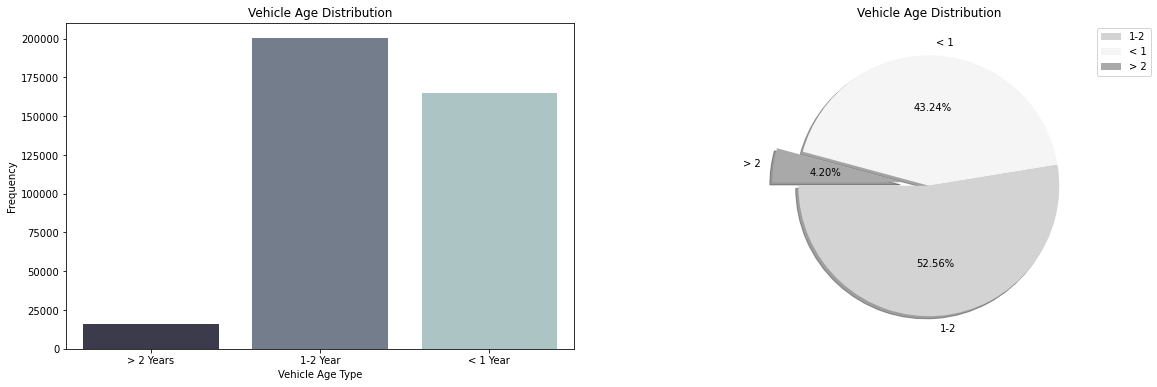

In [14]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print("Vehicle Age Count:")
print(train_data['Vehicle_Age'].value_counts())

sns.countplot(x = train_data['Vehicle_Age'],
              data = train_data,
              palette = 'bone')
plt.title('Vehicle Age Distribution')
plt.xlabel('Vehicle Age Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['1-2', '< 1', '> 2']
size = train_data['Vehicle_Age'].value_counts()
colors = ['lightgrey', 'whitesmoke', 'darkgrey']
explode = [0, 0, 0.2]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%', startangle=180)
plt.title('Vehicle Age Distribution')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))


plt.show()

Summary:
    
    1) Most of the customers vehicle's age was between 1-2 years followed by less than a year.

    2) We recored least nos of customers whose vehicle age was more than 2 years.

#### `VECHILE DAMAGE`

Vehicle_Damage Count:
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


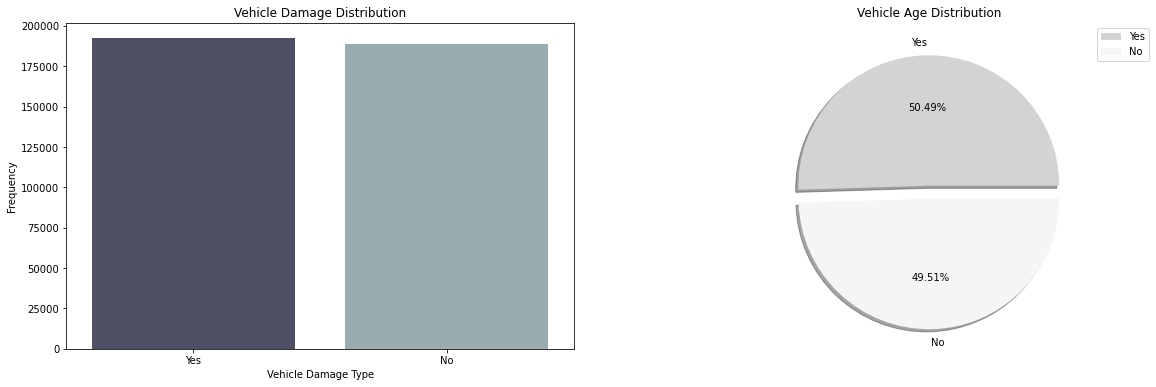

In [15]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print('Vehicle_Damage Count:')
print(train_data['Vehicle_Damage'].value_counts())

sns.countplot(x = train_data['Vehicle_Damage'],
              data = train_data,
              palette = 'bone')
plt.title('Vehicle Damage Distribution')
plt.xlabel('Vehicle Damage Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['Yes', 'No']
size = train_data['Vehicle_Damage'].value_counts()
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Vehicle Age Distribution')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))


plt.show()

Summary:
    
    1) Approximatly same amount of distribution is observed for Vehicle_Damage_Type.
    
    2) We can further analyz as to which Damage type received more response.

#### `ANNUAL PREMIUM`

Skewness : 1.7660872148961309, Kurtosis : 34.004568696114696


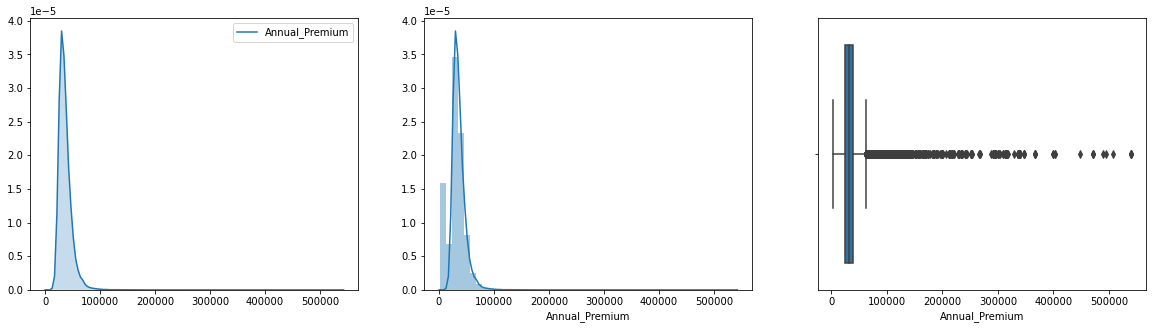

In [16]:
    plt.figure(figsize = (20,5))

    plt.subplot(1,3,1)
    sns.kdeplot(train_data['Annual_Premium'], shade=True)

    plt.subplot(1,3,2)
    sns.distplot(train_data['Annual_Premium'])

    plt.subplot(1,3,3)
    sns.boxplot(train_data['Annual_Premium'], orient = 'horizontal')

    print("Skewness : {}, Kurtosis : {}".format(train_data['Annual_Premium'].skew(), train_data['Annual_Premium'].kurtosis()))
    plt.show()

Summary:
    
    1) Skewness > 0 -> Right Skewed, Kurtosis > 0 (Platykurtic) -> More values distributed across tails.
    
    2) Outliers are observed which needs to be taken care.

#### `POLICY SALES CHANNEL`

Skewness : -0.9000081235103394, Kurtosis : -0.9708101781380822


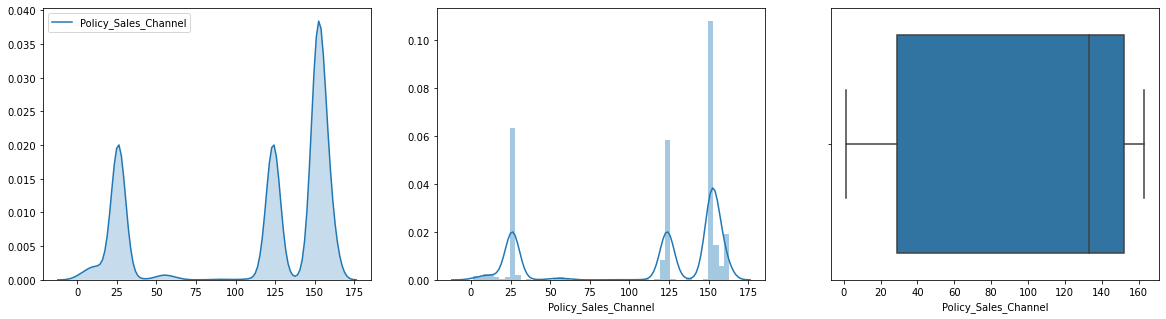

In [17]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.kdeplot(train_data['Policy_Sales_Channel'], shade=True)

plt.subplot(1,3,2)
sns.distplot(train_data['Policy_Sales_Channel'])

plt.subplot(1,3,3)
sns.boxplot(train_data['Policy_Sales_Channel'], orient = 'horizontal')

print("Skewness : {}, Kurtosis : {}".format(train_data['Policy_Sales_Channel'].skew(), train_data['Policy_Sales_Channel'].kurtosis()))
plt.show()

Summary:
    
    1) No outliers are observed.
    
    

#### `VINTAGE`

Skewness : 0.0030295168899980816, Kurtosis : -1.2006880422961197


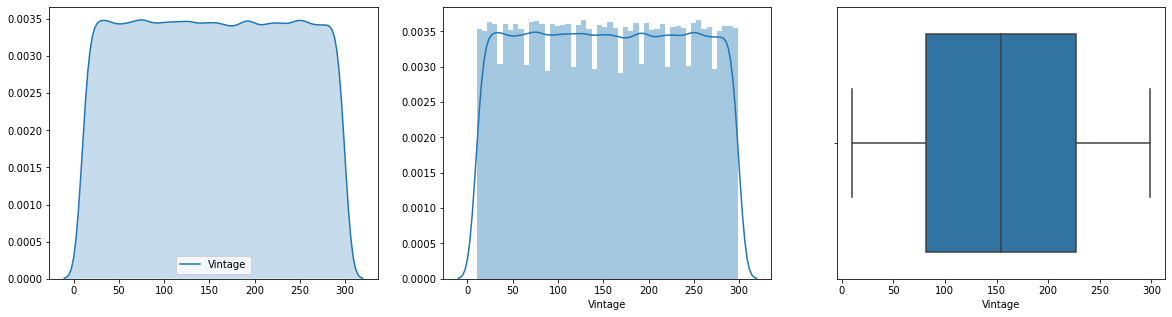

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.kdeplot(train_data['Vintage'], shade=True)

plt.subplot(1,3,2)
sns.distplot(train_data['Vintage'])

plt.subplot(1,3,3)
sns.boxplot(train_data['Vintage'], orient = 'horizontal')

print("Skewness : {}, Kurtosis : {}".format(train_data['Vintage'].skew(), train_data['Vintage'].kurtosis()))
plt.show()

Summary:
    
    1) From the visualization above we can see that, Vintage column is having uniform distribution.

<br>

> > __`BIVARIANT ANALYSIS`__

In [19]:
def categorical_categorical(col1):
    a = pd.crosstab(index = train_data[col1], columns = train_data['Response'])
    print(a.unstack())

    a.plot(kind = 'bar', stacked = True)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
    plt.show()  

Response  Gender
0         Female    156835
          Male      177564
1         Female     18185
          Male       28525
dtype: int64


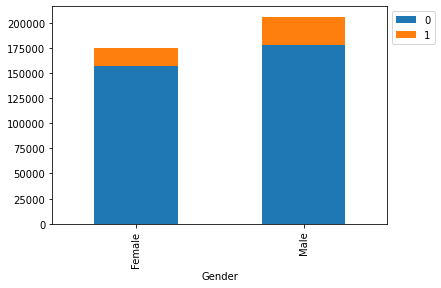

Response  Driving_License
0         0                     771
          1                  333628
1         0                      41
          1                   46669
dtype: int64


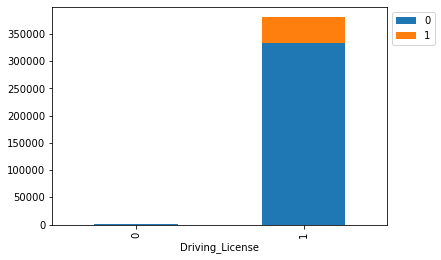

Response  Previously_Insured
0         0                     159929
          1                     174470
1         0                      46552
          1                        158
dtype: int64


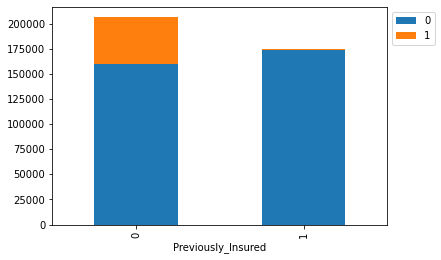

Response  Vehicle_Age
0         1-2 Year       165510
          < 1 Year       157584
          > 2 Years       11305
1         1-2 Year        34806
          < 1 Year         7202
          > 2 Years        4702
dtype: int64


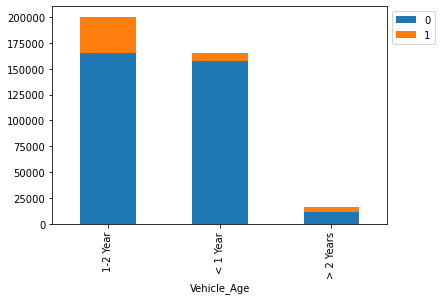

Response  Vehicle_Damage
0         No                187714
          Yes               146685
1         No                   982
          Yes                45728
dtype: int64


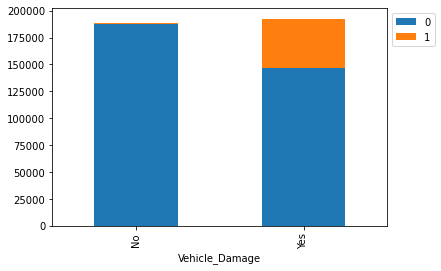

In [20]:
categorical_columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

for col1 in categorical_columns:
    categorical_categorical(col1)

Summary

    1) Male's where more intrested for the Vehicle Response as compared to Females.
    
    2) People those who had driving license where more likely to go for Vehicle Insurance.
    
    3) Also we could see people those who where not insured before wanted to go for new insurance policy offered by company.
    
    4) There was decrease in the trend observed for Vehicle_Age and Response -> 1-2 > less than 1 > more than 2.
    
    5) Most of the people whose vehicle was damaged where more likely to go for Vehicle Insurance.

[]

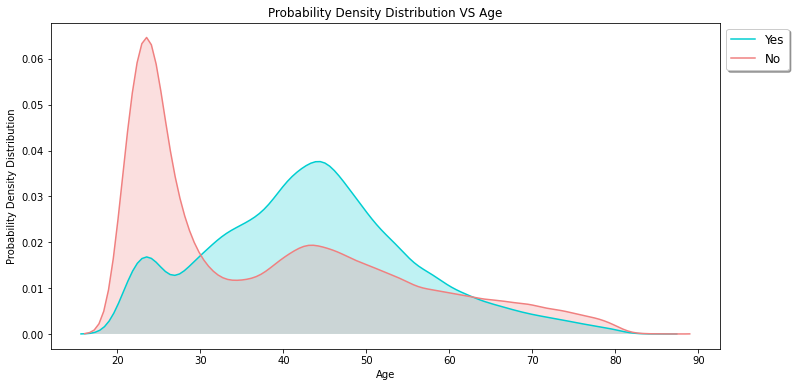

In [21]:
plt.figure(figsize = (12,6))
sns.kdeplot(train_data.Age[train_data.Response == 1], shade = True,  color = 'darkturquoise')
sns.kdeplot(train_data.Age[train_data.Response == 0], shade = True,  color = 'lightcoral')
plt.legend(['Yes', 'No'], loc = 'upper left', bbox_to_anchor = (1,1), prop={'size':12}, frameon=True, fancybox=True, shadow=True, framealpha=1)
plt.xlabel('Age')
plt.ylabel('Probability Density Distribution')
plt.title('Probability Density Distribution VS Age')
plt.plot()

Summary:
    
    1) Customers between 20-30 years of age have very less probabilty of not going with the insurance.
    
    2) Persons falling between 30-55 age group have more chances of puchasing the Vehicle Insurance.
    
    3) Beyond 55+ years of age we see a slight decline in the interest among teh customers toward Vehicle Insurance.

<br>

> > __`MULTIVARIANT ANALYSIS`__

Suppose a customers who prescribed for health insurance previously and may or may not be interested in vehicle insurance so the company will look for the `Age` and `Damage` parameters, as the premium will vary.

In [22]:
pd.crosstab(index = [train_data['Previously_Insured'], train_data['Vehicle_Age'], train_data['Vehicle_Damage']], columns = train_data['Response'])

Response                                            0      1
Previously_Insured Vehicle_Age Vehicle_Damage               
0                  1-2 Year    No               12106    557
                               Yes              88174  34154
                   < 1 Year    No               10966    353
                               Yes              37423   6787
                   > 2 Years   No                   8      0
                               Yes              11252   4701
1                  1-2 Year    No               59389     39
                               Yes               5841     56
                   < 1 Year    No              105238     33
                               Yes               3957     29
                   > 2 Years   No                   7      0
                               Yes                 38      1

<br>


> > __`HANDLING CATEGORICAL VALUE`__

In [23]:
# Gender
train_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)

test_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)


# Vehicle Age
train_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)

test_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)


# Vehicle Damage
train_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

test_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

<br>

(12.5, -0.5)

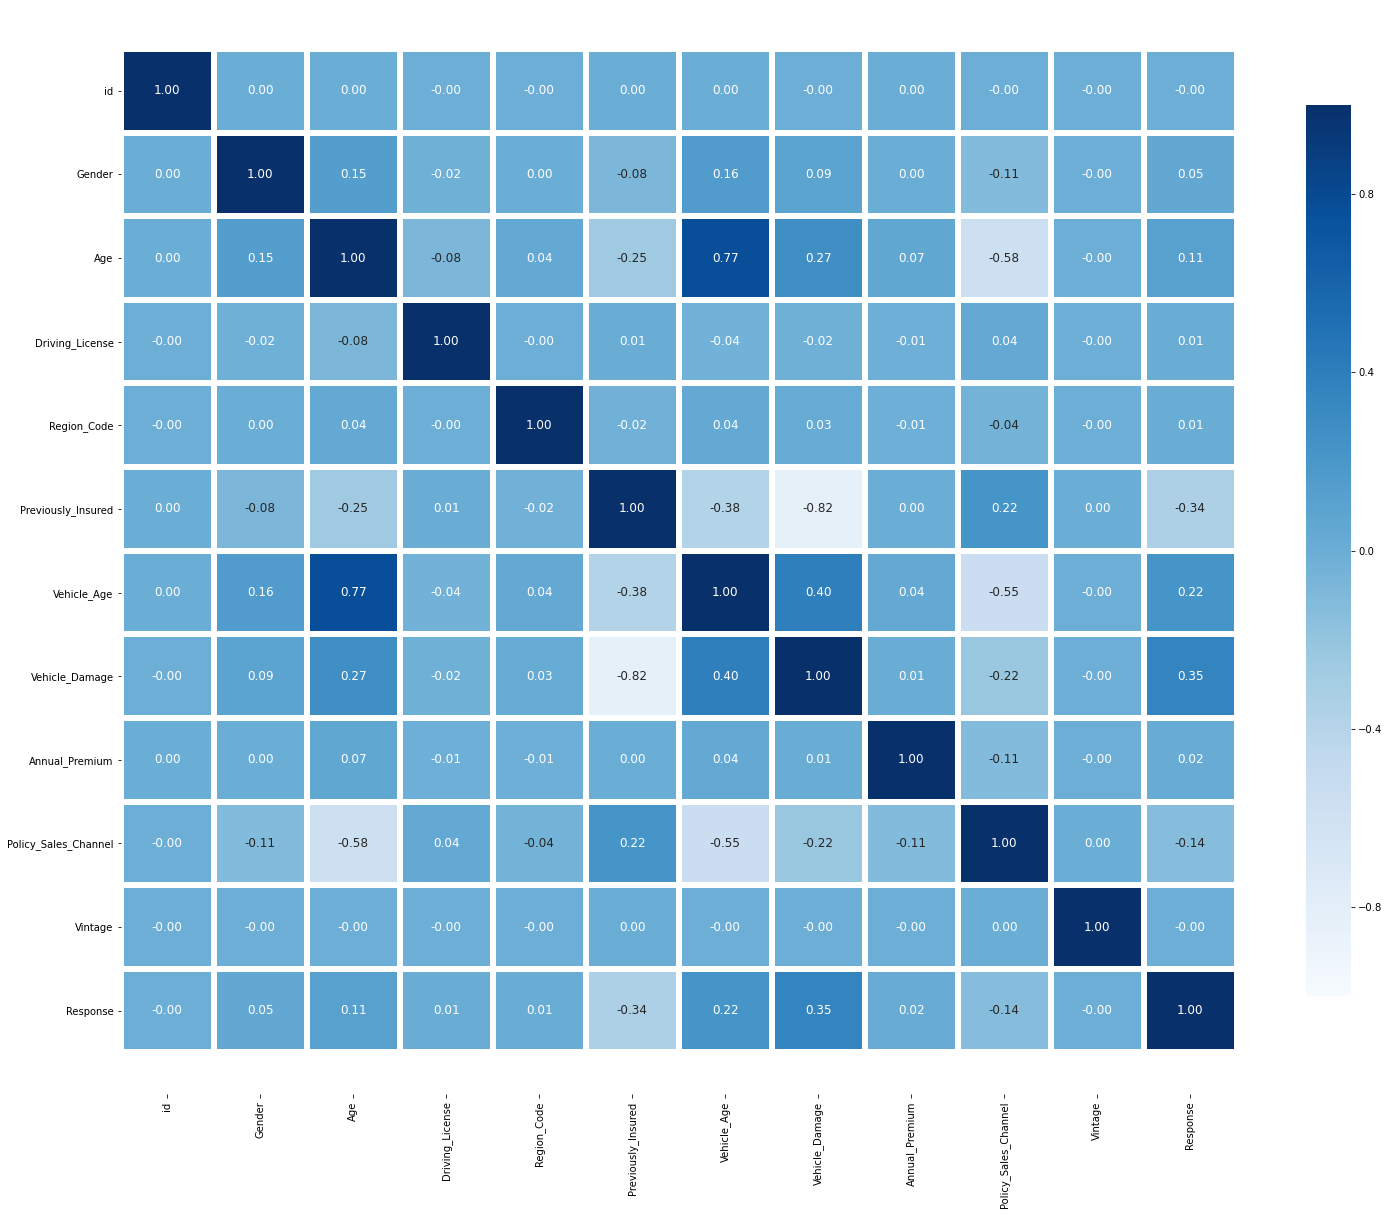

In [24]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0)      

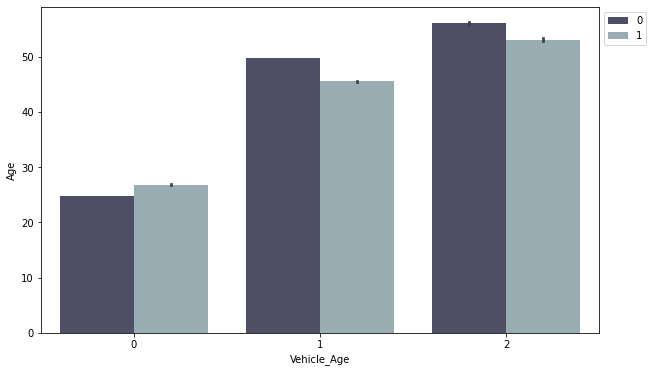

In [25]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Vehicle_Age',
            y = 'Age',
            data = train_data,
            hue = 'Response',
            palette = 'bone')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

    - As the age of the vehicle increase, generation gap also increases.
    
    - Age variable is highly related to Vehicle_Age parameter.

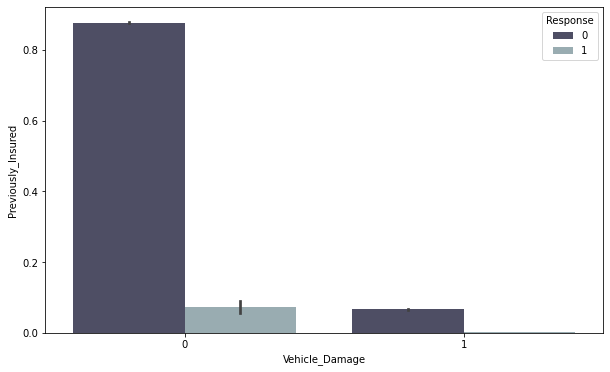

In [26]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Vehicle_Damage',
            y = 'Previously_Insured',
            data = train_data,
            hue = 'Response',
            palette = 'bone')
plt.show()

     - Vehicle_Damage and Previously_Insured are highly negative related with each other.

In [27]:
train_data_copy = train_data.copy()

test_data_copy  = test_data.copy()

### `STEP 4: FEATURE ENGINEERING`

In [ ]:
# Feature 1

a = train_data_copy.groupby(by = ['Age', 'Vintage']).size().reset_index()
a.columns = ['Age', 'Vintage', 'Age_Vintage_Count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Age', 'Vintage'], how = 'left')

b = test_data_copy.groupby(by = ['Age', 'Vintage']).size().reset_index()
b.columns = ['Age', 'Vintage', 'Age_Vintage_Count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Age', 'Vintage'], how = 'left')

Summary:

    - K-Fold cross validation strategy over 10 fold,  LB score increased from 0.799874081527452 (Base) -> 0.800124198668676
    
    - Using SK-Fold cross validation strategy there was no improvment when compared with base (0.799279478155551)
    
    - CATBOOST -> 0.7958888798504115
    - LIGHGBM  -> 0.800124198668676
 

In [ ]:
# Feature 2

a = train_data_copy.groupby(by = ['Age', 'Gender']).size().reset_index()
a.columns = ['Age', 'Gender', 'Age_Gender_Count']
train_data_copy = pd.merge(train_data_copy, a, on=['Age', 'Gender'], how='left')

b = test_data_copy.groupby(by = ['Age', 'Gender']).size().reset_index()
b.columns = ['Age', 'Gender', 'Age_Gender_Count']
test_data_copy = pd.merge(test_data_copy, a, on=['Age', 'Gender'], how='left')

    - CATBOOST -> 0.7966998575559306
    - LIGHTGBM -> 0.7995121629329975

In [ ]:
# Feature 3

a = train_data_copy.groupby(by = ['Age', 'Previously_Insured']).size().reset_index()
a.columns = ['Age', 'Previously_Insured', 'Age_Insured_Count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Age', 'Previously_Insured'], how = 'left')

b = test_data_copy.groupby(by = ['Age', 'Previously_Insured']).size().reset_index()
b.columns = ['Age', 'Previously_Insured', 'Age_Insured_Count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Age', 'Previously_Insured'], how = 'left')

    - CATBOOST -> 0.7851521272326527
    - LIGHTGBM -> 0.7997692920739083

In [ ]:
# Feature 4

a = train_data_copy.groupby(by = ['Age', 'Vehicle_Age']).size().reset_index()
a.columns = ['Age', 'Vehicle_Age', 'Age_Vehicleage_Count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Age', 'Vehicle_Age'], how = 'left')


b = train_data_copy.groupby(by = ['Age', 'Vehicle_Age']).size().reset_index()
b.columns = ['Age', 'Vehicle_Age', 'Age_Vehicleage_Count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Age', 'Vehicle_Age'], how = 'left')

Summary 

    - CATBOOST ->  0.7591216884935009
    - LIGHTGBM ->  0.7973888939241163
  
  
   - This feature does not performs well as our base model AUC - 0.799874081527452, so we can ignore this feature from dataset.
  

In [ ]:
train_data_copy.drop(columns = ['Age_Vehicleage_Count'],
                     axis = 1,
                     inplace = True)

test_data_copy.drop(columns = ['Age_Vehicleage_Count'],
                    axis = 1,
                    inplace = True)

In [ ]:
# Feature 5

a = train_data_copy.groupby(by = ['Age', 'Vehicle_Damage']).size().reset_index()
a.columns = ['Age', 'Vehicle_Damage', 'Age_Vehicledamage_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Age', 'Vehicle_Damage'], how = 'left')

b = test_data_copy.groupby(by = ['Age', 'Vehicle_Damage']).size().reset_index()
b.columns = ['Age', 'Vehicle_Damage', 'Age_Vehicledamage_count']
test_data_copy = pd.merge(test_data_copy, a, on = ['Age', 'Vehicle_Damage'], how = 'left')

Summary :
    
    - CATBOOST -> 0.7990442903604951
    - LIGHTGBM -> 0.8003411126599919

In [ ]:
# Feature 6

a = train_data_copy.groupby(by = ['Previously_Insured', 'Vehicle_Age']).size().reset_index()
a.columns = ['Previously_Insured', 'Vehicle_Age', 'Insurance_Vehicleage_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Previously_Insured', 'Vehicle_Age'], how = 'left')

b = test_data_copy.groupby(by = ['Previously_Insured', 'Vehicle_Age']).size().reset_index()
b.columns = ['Previously_Insured', 'Vehicle_Age', 'Insurance_Vehicleage_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Previously_Insured', 'Vehicle_Age'], how = 'left')

Summary : 
    
     - CATBOOST -> 0.799471365521151
     - LIGHTGBM -> 0.798396289279589

In [ ]:
# Feature 7

a = train_data_copy.groupby(by = ['Previously_Insured', 'Vehicle_Damage']).size().reset_index()
a.columns = ['Previously_Insured', 'Vehicle_Damage', 'Insured_Vehicledamage_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Previously_Insured', 'Vehicle_Damage'], how = 'left')

b = test_data_copy.groupby(by = ['Previously_Insured', 'Vehicle_Damage']).size().reset_index()
b.columns = ['Previously_Insured', 'Vehicle_Damage', 'Insured_Vehicledamage_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Previously_Insured', 'Vehicle_Damage'], how = 'left')

In [ ]:
# Feature 8

train_data_copy['Mean_Age_Region'] = train_data_copy.groupby(by = ['Region_Code'])['Age'].transform('mean')

test_data_copy['Mean_Age_Region']  = test_data_copy.groupby(by = ['Region_Code'])['Age'].transform('mean')

In [ ]:
# Feature 9

train_data_copy['Mean_Premium_Damage'] = train_data_copy.groupby(by = ['Vehicle_Damage'])['Annual_Premium'].transform('mean')

test_data_copy['Mean_Premium_Damage'] = test_data_copy.groupby(by = ['Vehicle_Damage'])['Annual_Premium'].transform('mean')

In [ ]:
# Feature 10

train_data_copy['Mean_Premium_Vehicleage'] = train_data_copy.groupby(by = ['Vehicle_Age'])['Annual_Premium'].transform('mean')

test_data_copy['Mean_Premium_Vehicleage'] = test_data_copy.groupby(by =  ['Vehicle_Age'])['Annual_Premium'].transform('mean')

<br>

In [31]:
# Splitting Data - Independent & Dependent 

X = train_data_copy.drop(columns = ['Response', 'id'],
                         axis = 1)

y = train_data_copy['Response']

In [32]:
test_data_copy.drop(columns = 'id',
                    axis = 1,
                    inplace = True)

In [33]:
# Splitting Data  - Training and Test

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [34]:
train_data_copy.shape, test_data_copy.shape

((381109, 12), (127037, 10))

In [35]:
import lightgbm as lg
from sklearn.metrics import roc_auc_score,roc_curve, auc

<br>

## `LIGHTGBM`

####  `N_ESTIMATORS`

In [45]:
#n_estimators = np.linspace(100,5000).astype('int')
#n_estimators

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
       3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
       4500, 4600, 4700, 4800, 4900, 5000])

In [46]:
import time 

n_estimators = np.linspace(100,5000).astype('int')

train_result = []

test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = lg.LGBMClassifier(n_estimators = estimators,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict(X_val)
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

Succussfully Completed 

Execution Time : 1578.3598358631134


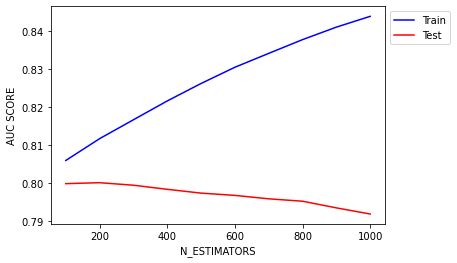

In [57]:
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators[0:10], train_result[0:10], 'b', label = 'Train')
line2 = plt.plot(n_estimators[0:10], test_result[0:10],  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N_ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - More nos of estimators results in overfitting.

In [78]:
# Training the model between 100 - 200 estimators 

import time 

n_estimators = [100, 125, 150, 175, 200]

train_result = []

test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = lg.LGBMClassifier(n_estimators = estimators,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

Succussfully Completed 

Execution Time : 8.587522745132446


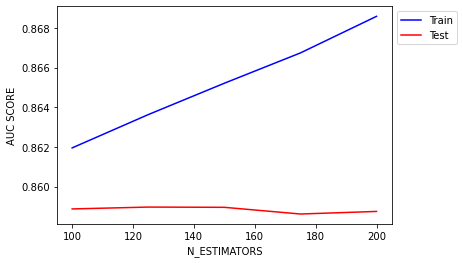

In [79]:
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators, train_result, 'b', label = 'Train')
line2 = plt.plot(n_estimators, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N_ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We will finalize 150 as nos. of estimators for LIGHTGBM.

<br>

#### `MAX_DEPTH`

In [87]:
import time 

max_depths =  np.linspace(1, 30, 30).astype('int')

train_result = []
test_result  = []

start_time = time.time()

for depth in max_depths:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = depth,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

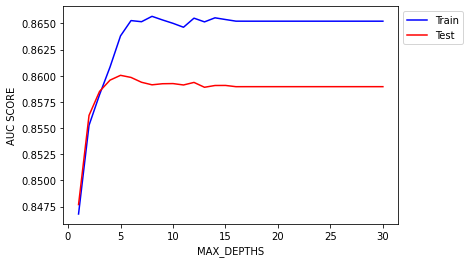

In [88]:
import matplotlib.pyplot as plt

line1 = plt.plot(max_depths, train_result, 'b', label = 'Train')
line2 = plt.plot(max_depths, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("MAX_DEPTHS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We will finalize our max_depth as 5

<br>

#### `BOOSTING`

In [82]:
import time 

boosting =  ['gbdt', 'dart']

train_result = []
test_result  = []

start_time = time.time()

for boost in boosting:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            boosting = boost,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Succussfully Completed 

Execution Time : 6.948550462722778


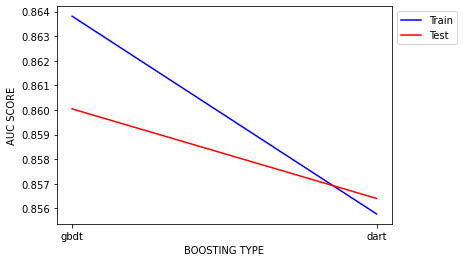

In [85]:
import matplotlib.pyplot as plt

line1 = plt.plot(boosting, train_result, 'b', label = 'Train')
line2 = plt.plot(boosting, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("BOOSTING TYPE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:

    - We will choose GBDT as our boosting type.

<br>

#### `LEARNING RATE`

In [94]:
import time 

learn_rate = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

train_result = []
test_result  = []

start_time = time.time()

for rate in learn_rate:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            boosting = 'gbdt',
                            learning_rate = rate,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Accuracy may be bad since you d

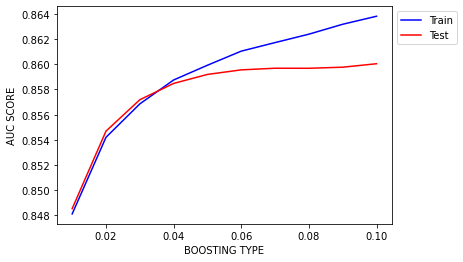

In [95]:
import matplotlib.pyplot as plt

line1 = plt.plot(learn_rate, train_result, 'b', label = 'Train')
line2 = plt.plot(learn_rate, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("LEARNING RATE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary

    - We will finalize 0.04 as our learning_rate

<br>

#### `NUM_LEAVES`

In [101]:
import time 

num_leaves = [15,20,25,30,32]

train_result = []
test_result  = []

start_time = time.time()

for leaves in num_leaves:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            num_leaves = leaves,
                            boosting_type = 'gbdt',
                            learning_rate = 0.04,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

Succussfully Completed 

Execution Time : 9.168508768081665


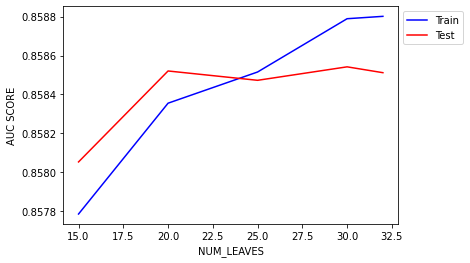

In [102]:
import matplotlib.pyplot as plt

line1 = plt.plot(num_leaves, train_result, 'b', label = 'Train')
line2 = plt.plot(num_leaves, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("NUM_LEAVES")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
     - We will set num_leaves = 30

<br>

#### `SUBSAMPLE`

In [104]:
import time 

sub_sample = [0.6,0.7,0.8,0.9,1]

train_result = []
test_result  = []

start_time = time.time()

for sample in sub_sample:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            num_leaves = 30,
                            boosting_type = 'gbdt',
                            learning_rate = 0.04,
                            subsample = sample,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

Succussfully Completed 

Execution Time : 9.648671627044678


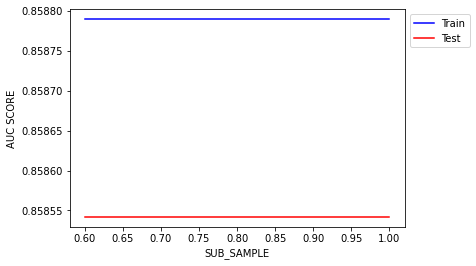

In [106]:
import matplotlib.pyplot as plt

line1 = plt.plot(sub_sample, train_result, 'b', label = 'Train')
line2 = plt.plot(sub_sample, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUB_SAMPLE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary : 
    
    - No change in improvement is observed including this parameter.

#### `COLSAMPLE_BYTREE`

In [107]:
import time 

colsample_bytree = [0.6,0.7,0.8,0.9,1]

train_result = []
test_result  = []

start_time = time.time()

for sample in colsample_bytree:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            num_leaves = 30,
                            boosting_type = 'gbdt',
                            learning_rate = 0.04,
                            colsample_bytree = sample,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

Succussfully Completed 

Execution Time : 9.72506070137024


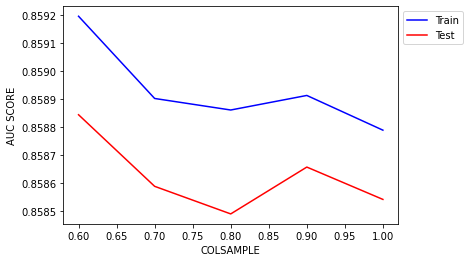

In [109]:
import matplotlib.pyplot as plt

line1 = plt.plot(colsample_bytree, train_result, 'b', label = 'Train')
line2 = plt.plot(colsample_bytree, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("COLSAMPLE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary: 
    
    - We can set colsample_bytree as 0.6

<br>

### `LIGHTGBM - TUNED PARAMETER`

In [68]:
import lightgbm as lg

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 43)
scores   = []
predicts = []

for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]


    # Initializing Model
    clf = lg.LGBMClassifier(n_estimators = 500,
                            max_depth = 5,
                            num_leaves = 20,
                            is_unbalance = True,
                            boosting_type = 'gbdt',
                            learning_rate = 0.05,
                            colsample_bytree = 0.6,
                            objective = 'binary',
                            metric = 'auc',
                            n_jobs =-1,
                            random_state = 43)


    # Training the Ensemble Classifier
    clf.fit(X_train, y_train)

    # Predictions on valid Data
    y_pred = clf.predict(X_val)
    score  = roc_auc_score(y_pred, y_val)
    print(score)
    scores.append(score)
     
    
    predicts.append(clf.predict_proba(test_data_copy)[:,1])
    
print("Avg", np.mean(scores))

0.6362773846551635
0.6346925392506181
0.636223647096111
0.6331289959079518
0.636479691013133
0.6346056206503142
0.6344220039399371
0.6317447441344394
0.6357970611077506
0.6355505991428322
Avg 0.6348922286898252


In [66]:
col = np.mean(predicts, 0)
col

array([0.00640949, 0.77892453, 0.75692248, ..., 0.00125065, 0.00093275,
       0.00679357])

In [67]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = col
sample_submit.to_csv('sample_submission_LGBM_Tuned.csv', index = False)

Summary: 
    
    - N_Estimators (200) -> 0.857006450798286
    
    - N_Estimators (500) -> 0.857683762037881
    
    - N-Estimators (1000)-> 0.857492632678324
    
    - We observe that after 500 estimators we observe slight decrease in th AUC_ROC for test data.

<br>

## `CATBOOST`

In [138]:
import catboost as cb

In [139]:
train_data = pd.read_csv('train.csv')

test_data  = pd.read_csv('test.csv')

print("Data Imported Successfully")

Data Imported Successfully


In [140]:
categorical_col = ['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [141]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [145]:
# Changing data type because cat_feature in catboost cannot be float

#train_data['Driving_License'] = train_data['Driving_License'].astype('str')
#test_data['Driving_License']  = test_data['Driving_License'].astype('str')

train_data['Region_Code'] = train_data['Region_Code'].astype('int64')
test_data['Region_Code']  = test_data['Region_Code'].astype('int64')

#train_data['Previously_Insured'] = train_data['Previously_Insured'].astype('str')
#test_data['Previously_Insured']  = test_data['Previously_Insured'].astype('str')

train_data['Policy_Sales_Channel'] = train_data['Policy_Sales_Channel'].astype('int64')
test_data['Policy_Sales_Channel']  = test_data['Policy_Sales_Channel'].astype('int64')

In [146]:
# Splitting Data - Independent & Dependent 

X = train_data.drop(columns = ['id', 'Response'],
                    axis = 1)

y = train_data['Response']

In [148]:
test_data.drop(columns = 'id',
               axis = 1,
               inplace = True)

In [112]:
# Splitting Data - Training & Validation

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state = 43)

<br>

#### `N_ESTIMATORS`

In [99]:
import time 

n_estimators = np.linspace(100, 500, 5).astype('int')

train_result = []
test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = cb.CatBoostClassifier(n_estimators = estimators,
                                random_state = 43,
                                auto_class_weights = 'Balanced',
                                cat_features = categorical_col)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

Learning rate set to 0.5
0:	learn: 0.5371178	total: 216ms	remaining: 21.4s
1:	learn: 0.4822599	total: 267ms	remaining: 13.1s
2:	learn: 0.4580868	total: 307ms	remaining: 9.93s
3:	learn: 0.4466990	total: 345ms	remaining: 8.27s
4:	learn: 0.4364663	total: 396ms	remaining: 7.52s
5:	learn: 0.4323405	total: 440ms	remaining: 6.89s
6:	learn: 0.4294434	total: 480ms	remaining: 6.37s
7:	learn: 0.4274380	total: 522ms	remaining: 6s
8:	learn: 0.4265941	total: 559ms	remaining: 5.65s
9:	learn: 0.4255479	total: 598ms	remaining: 5.38s
10:	learn: 0.4252491	total: 641ms	remaining: 5.18s
11:	learn: 0.4246202	total: 680ms	remaining: 4.99s
12:	learn: 0.4236496	total: 719ms	remaining: 4.81s
13:	learn: 0.4235064	total: 754ms	remaining: 4.63s
14:	learn: 0.4232944	total: 794ms	remaining: 4.5s
15:	learn: 0.4229325	total: 853ms	remaining: 4.48s
16:	learn: 0.4228802	total: 900ms	remaining: 4.4s
17:	learn: 0.4226819	total: 952ms	remaining: 4.34s
18:	learn: 0.4223793	total: 1s	remaining: 4.29s
19:	learn: 0.4223113	tot

62:	learn: 0.4133766	total: 9.56s	remaining: 20.8s
63:	learn: 0.4132480	total: 9.71s	remaining: 20.6s
64:	learn: 0.4131945	total: 9.87s	remaining: 20.5s
65:	learn: 0.4131761	total: 10s	remaining: 20.3s
66:	learn: 0.4130691	total: 10.2s	remaining: 20.2s
67:	learn: 0.4129662	total: 10.3s	remaining: 20s
68:	learn: 0.4128885	total: 10.4s	remaining: 19.8s
69:	learn: 0.4127469	total: 10.6s	remaining: 19.7s
70:	learn: 0.4126899	total: 10.7s	remaining: 19.5s
71:	learn: 0.4125215	total: 10.8s	remaining: 19.3s
72:	learn: 0.4123770	total: 11s	remaining: 19.1s
73:	learn: 0.4123511	total: 11.1s	remaining: 18.9s
74:	learn: 0.4122028	total: 11.3s	remaining: 18.8s
75:	learn: 0.4121242	total: 11.4s	remaining: 18.6s
76:	learn: 0.4119683	total: 11.6s	remaining: 18.5s
77:	learn: 0.4118270	total: 11.7s	remaining: 18.4s
78:	learn: 0.4117749	total: 11.9s	remaining: 18.2s
79:	learn: 0.4117077	total: 12s	remaining: 18s
80:	learn: 0.4116842	total: 12.1s	remaining: 17.7s
81:	learn: 0.4115558	total: 12.2s	remaini

24:	learn: 0.4196054	total: 3.93s	remaining: 43.3s
25:	learn: 0.4194066	total: 4.11s	remaining: 43.3s
26:	learn: 0.4192218	total: 4.3s	remaining: 43.5s
27:	learn: 0.4190859	total: 4.44s	remaining: 43.1s
28:	learn: 0.4189533	total: 4.58s	remaining: 42.8s
29:	learn: 0.4189243	total: 4.7s	remaining: 42.3s
30:	learn: 0.4189124	total: 4.76s	remaining: 41.3s
31:	learn: 0.4188570	total: 4.9s	remaining: 41s
32:	learn: 0.4187963	total: 5.04s	remaining: 40.8s
33:	learn: 0.4186412	total: 5.18s	remaining: 40.6s
34:	learn: 0.4184091	total: 5.29s	remaining: 40.1s
35:	learn: 0.4183678	total: 5.38s	remaining: 39.5s
36:	learn: 0.4182819	total: 5.51s	remaining: 39.2s
37:	learn: 0.4181368	total: 5.65s	remaining: 39s
38:	learn: 0.4180110	total: 5.77s	remaining: 38.6s
39:	learn: 0.4179020	total: 5.88s	remaining: 38.3s
40:	learn: 0.4178097	total: 6.07s	remaining: 38.4s
41:	learn: 0.4177393	total: 6.22s	remaining: 38.2s
42:	learn: 0.4175857	total: 6.38s	remaining: 38.1s
43:	learn: 0.4174925	total: 6.52s	rema

186:	learn: 0.4057317	total: 33.9s	remaining: 20.5s
187:	learn: 0.4056903	total: 34.1s	remaining: 20.3s
188:	learn: 0.4056497	total: 34.2s	remaining: 20.1s
189:	learn: 0.4056122	total: 34.4s	remaining: 19.9s
190:	learn: 0.4056018	total: 34.6s	remaining: 19.7s
191:	learn: 0.4055421	total: 34.8s	remaining: 19.5s
192:	learn: 0.4054514	total: 34.9s	remaining: 19.4s
193:	learn: 0.4054013	total: 35.1s	remaining: 19.2s
194:	learn: 0.4053266	total: 35.3s	remaining: 19s
195:	learn: 0.4052903	total: 35.5s	remaining: 18.8s
196:	learn: 0.4052017	total: 35.7s	remaining: 18.7s
197:	learn: 0.4051526	total: 35.9s	remaining: 18.5s
198:	learn: 0.4050456	total: 36.2s	remaining: 18.4s
199:	learn: 0.4050142	total: 36.3s	remaining: 18.2s
200:	learn: 0.4049501	total: 36.6s	remaining: 18s
201:	learn: 0.4049011	total: 36.8s	remaining: 17.8s
202:	learn: 0.4048380	total: 37s	remaining: 17.7s
203:	learn: 0.4047906	total: 37.3s	remaining: 17.5s
204:	learn: 0.4047053	total: 37.5s	remaining: 17.4s
205:	learn: 0.4045

46:	learn: 0.4183200	total: 10.4s	remaining: 1m 17s
47:	learn: 0.4181471	total: 10.6s	remaining: 1m 17s
48:	learn: 0.4179739	total: 10.9s	remaining: 1m 17s
49:	learn: 0.4178959	total: 11.1s	remaining: 1m 17s
50:	learn: 0.4177821	total: 11.3s	remaining: 1m 17s
51:	learn: 0.4176626	total: 11.6s	remaining: 1m 17s
52:	learn: 0.4175625	total: 11.8s	remaining: 1m 17s
53:	learn: 0.4174149	total: 12.1s	remaining: 1m 17s
54:	learn: 0.4173594	total: 12.4s	remaining: 1m 17s
55:	learn: 0.4172608	total: 12.7s	remaining: 1m 17s
56:	learn: 0.4171842	total: 12.9s	remaining: 1m 17s
57:	learn: 0.4170679	total: 13.1s	remaining: 1m 17s
58:	learn: 0.4169440	total: 13.3s	remaining: 1m 17s
59:	learn: 0.4168363	total: 13.6s	remaining: 1m 16s
60:	learn: 0.4167759	total: 13.8s	remaining: 1m 16s
61:	learn: 0.4166517	total: 14s	remaining: 1m 16s
62:	learn: 0.4165662	total: 14.3s	remaining: 1m 16s
63:	learn: 0.4164987	total: 14.5s	remaining: 1m 15s
64:	learn: 0.4164522	total: 14.7s	remaining: 1m 15s
65:	learn: 0.4

206:	learn: 0.4077175	total: 41s	remaining: 38.3s
207:	learn: 0.4076995	total: 41.2s	remaining: 38.1s
208:	learn: 0.4076166	total: 41.4s	remaining: 37.8s
209:	learn: 0.4075758	total: 41.6s	remaining: 37.6s
210:	learn: 0.4075198	total: 41.8s	remaining: 37.4s
211:	learn: 0.4074440	total: 42s	remaining: 37.2s
212:	learn: 0.4073930	total: 42.2s	remaining: 37s
213:	learn: 0.4073761	total: 42.3s	remaining: 36.8s
214:	learn: 0.4073437	total: 42.5s	remaining: 36.6s
215:	learn: 0.4072643	total: 42.7s	remaining: 36.3s
216:	learn: 0.4072148	total: 42.8s	remaining: 36.1s
217:	learn: 0.4071458	total: 43s	remaining: 35.9s
218:	learn: 0.4070892	total: 43.2s	remaining: 35.7s
219:	learn: 0.4070112	total: 43.4s	remaining: 35.5s
220:	learn: 0.4069203	total: 43.6s	remaining: 35.3s
221:	learn: 0.4069100	total: 43.7s	remaining: 35.1s
222:	learn: 0.4068722	total: 43.9s	remaining: 34.8s
223:	learn: 0.4068042	total: 44.1s	remaining: 34.7s
224:	learn: 0.4067807	total: 44.3s	remaining: 34.5s
225:	learn: 0.406744

365:	learn: 0.4000832	total: 1m 12s	remaining: 6.76s
366:	learn: 0.4000309	total: 1m 12s	remaining: 6.56s
367:	learn: 0.4000073	total: 1m 13s	remaining: 6.36s
368:	learn: 0.3999190	total: 1m 13s	remaining: 6.17s
369:	learn: 0.3998890	total: 1m 13s	remaining: 5.97s
370:	learn: 0.3998405	total: 1m 13s	remaining: 5.77s
371:	learn: 0.3998175	total: 1m 14s	remaining: 5.58s
372:	learn: 0.3997519	total: 1m 14s	remaining: 5.38s
373:	learn: 0.3996976	total: 1m 14s	remaining: 5.18s
374:	learn: 0.3996441	total: 1m 14s	remaining: 4.98s
375:	learn: 0.3996153	total: 1m 14s	remaining: 4.78s
376:	learn: 0.3996014	total: 1m 15s	remaining: 4.58s
377:	learn: 0.3995716	total: 1m 15s	remaining: 4.39s
378:	learn: 0.3995286	total: 1m 15s	remaining: 4.19s
379:	learn: 0.3995017	total: 1m 15s	remaining: 3.99s
380:	learn: 0.3994556	total: 1m 15s	remaining: 3.79s
381:	learn: 0.3993184	total: 1m 16s	remaining: 3.59s
382:	learn: 0.3992158	total: 1m 16s	remaining: 3.39s
383:	learn: 0.3991929	total: 1m 16s	remaining:

122:	learn: 0.4141123	total: 23.3s	remaining: 1m 11s
123:	learn: 0.4140600	total: 23.5s	remaining: 1m 11s
124:	learn: 0.4138945	total: 23.7s	remaining: 1m 11s
125:	learn: 0.4138467	total: 23.9s	remaining: 1m 10s
126:	learn: 0.4138234	total: 24.1s	remaining: 1m 10s
127:	learn: 0.4137907	total: 24.3s	remaining: 1m 10s
128:	learn: 0.4137297	total: 24.5s	remaining: 1m 10s
129:	learn: 0.4136798	total: 24.7s	remaining: 1m 10s
130:	learn: 0.4136292	total: 24.9s	remaining: 1m 10s
131:	learn: 0.4135713	total: 25.1s	remaining: 1m 10s
132:	learn: 0.4135225	total: 25.3s	remaining: 1m 9s
133:	learn: 0.4134837	total: 25.5s	remaining: 1m 9s
134:	learn: 0.4134293	total: 25.8s	remaining: 1m 9s
135:	learn: 0.4134017	total: 26s	remaining: 1m 9s
136:	learn: 0.4133308	total: 26.2s	remaining: 1m 9s
137:	learn: 0.4132428	total: 26.4s	remaining: 1m 9s
138:	learn: 0.4132071	total: 26.6s	remaining: 1m 9s
139:	learn: 0.4131558	total: 26.8s	remaining: 1m 9s
140:	learn: 0.4131410	total: 27s	remaining: 1m 8s
141:	l

281:	learn: 0.4068660	total: 57.4s	remaining: 44.4s
282:	learn: 0.4068307	total: 57.6s	remaining: 44.2s
283:	learn: 0.4067780	total: 57.8s	remaining: 44s
284:	learn: 0.4067746	total: 58s	remaining: 43.7s
285:	learn: 0.4067525	total: 58.2s	remaining: 43.5s
286:	learn: 0.4067169	total: 58.4s	remaining: 43.3s
287:	learn: 0.4066796	total: 58.5s	remaining: 43.1s
288:	learn: 0.4066470	total: 58.7s	remaining: 42.9s
289:	learn: 0.4066176	total: 58.9s	remaining: 42.6s
290:	learn: 0.4065688	total: 59s	remaining: 42.4s
291:	learn: 0.4065273	total: 59.2s	remaining: 42.1s
292:	learn: 0.4064752	total: 59.4s	remaining: 41.9s
293:	learn: 0.4064629	total: 59.5s	remaining: 41.7s
294:	learn: 0.4064438	total: 59.7s	remaining: 41.5s
295:	learn: 0.4064183	total: 59.9s	remaining: 41.3s
296:	learn: 0.4063723	total: 1m	remaining: 41s
297:	learn: 0.4062979	total: 1m	remaining: 40.8s
298:	learn: 0.4062194	total: 1m	remaining: 40.6s
299:	learn: 0.4061934	total: 1m	remaining: 40.4s
300:	learn: 0.4061846	total: 1m	

438:	learn: 0.4008091	total: 1m 25s	remaining: 11.9s
439:	learn: 0.4007905	total: 1m 25s	remaining: 11.7s
440:	learn: 0.4007757	total: 1m 25s	remaining: 11.5s
441:	learn: 0.4007252	total: 1m 25s	remaining: 11.3s
442:	learn: 0.4006700	total: 1m 26s	remaining: 11.1s
443:	learn: 0.4006621	total: 1m 26s	remaining: 10.9s
444:	learn: 0.4006224	total: 1m 26s	remaining: 10.7s
445:	learn: 0.4005723	total: 1m 26s	remaining: 10.5s
446:	learn: 0.4005585	total: 1m 26s	remaining: 10.3s
447:	learn: 0.4005249	total: 1m 26s	remaining: 10.1s
448:	learn: 0.4004918	total: 1m 27s	remaining: 9.9s
449:	learn: 0.4004417	total: 1m 27s	remaining: 9.71s
450:	learn: 0.4003672	total: 1m 27s	remaining: 9.52s
451:	learn: 0.4003327	total: 1m 27s	remaining: 9.33s
452:	learn: 0.4002884	total: 1m 28s	remaining: 9.13s
453:	learn: 0.4002753	total: 1m 28s	remaining: 8.93s
454:	learn: 0.4002174	total: 1m 28s	remaining: 8.74s
455:	learn: 0.4001879	total: 1m 28s	remaining: 8.54s
456:	learn: 0.4000985	total: 1m 28s	remaining: 

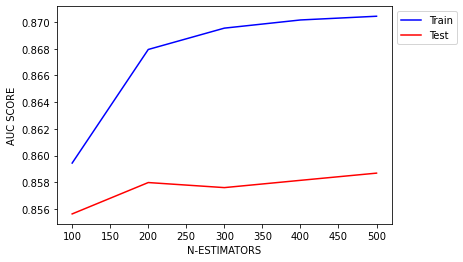

In [104]:
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators, train_result, 'b', label = 'Train')
line2 = plt.plot(n_estimators, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N-ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary: 
    
    - We can finalize our n_estimators as 500

<br>

#### `MAX_DEPTH`

In [123]:
import time 
from sklearn.model_selection import StratifiedKFold

max_depths =  [5, 7, 9, 11]

train_result = []
test_result  = []

start_time = time.time()

kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 43)

for depth in max_depths:
    kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 43)
    train_scores   = []
    test_scores    = []


    for train_index, test_index in kfold.split(X, y):
        x_tr, x_val = X.iloc[train_index], X.iloc[test_index]
        y_tr, y_val = y.iloc[train_index], y.iloc[test_index]


    # Initializing Model
        clf = cb.CatBoostClassifier(n_estimators = 500,
                                   max_depth = depth,
                                   random_state = 43,
                                   auto_class_weights = 'Balanced',
                                   cat_features = categorical_col,
                                   verbose = 0)


        # Training the Ensemble Classifier
        clf.fit(x_tr, y_tr)

        
        train_pred = clf.predict_proba(x_tr)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_tr, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_scores.append(roc_auc)

        test_pred = clf.predict_proba(x_val)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_scores.append(roc_auc)
        
    train_result.append(np.mean(train_scores))
    test_result.append(np.mean(test_scores))
    
    print("Avg", np.mean(test_scores))
    
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

Avg 0.8574276431558122
Avg 0.8550636580354508
Avg 0.849425449886601
Avg 0.841974504196279
Succussfully Completed 

Execution Time : 1436.0653553009033


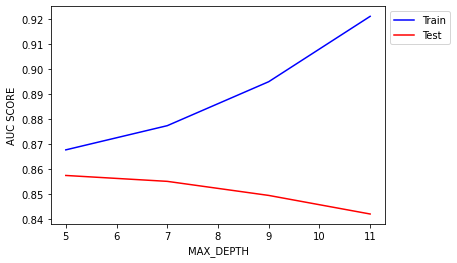

In [129]:
import matplotlib.pyplot as plt

line1 = plt.plot(max_depths, train_result, 'b', label = 'Train')
line2 = plt.plot(max_depths, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("MAX_DEPTH")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We would finalize max_depth as 5

**NOTE**:

    1) CATBOOST automatically assigns learning rate while training, so we will not tune that parameter.
  
    2) CATBOOST uses symmetric grow_policy so no setting of num_leaves is required.

<br>

### `CATBOOST TUNED`

In [156]:
import lightgbm as lg
import time 

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 43)
scores   = []
predicts = []

start_time = time.time()
for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]


    # Initializing Model
    clf = cb.CatBoostClassifier(n_estimators = 1000,
                                max_depth = 5,
                                random_state = 43,
                                auto_class_weights = 'Balanced',
                                cat_features = categorical_col,
                                verbose = 0)


    # Training the Ensemble Classifier
    clf.fit(X_train, y_train)

    # Predictions on valid Data
    y_pred = clf.predict(X_val)
    score  = roc_auc_score(y_pred, y_val)
    print(score)
    scores.append(score)
     
    
    predicts.append(clf.predict_proba(test_data)[:,1])
    
print("Avg", np.mean(scores))

end_time = time.time()
print("\n")
print("Execution Time : {}".format(end_time - start_time))

0.6373378664386646
0.6355485830075079
0.636818103652007
0.6333513782215313
0.6378103207620873
0.6350612407321222
0.6350615200257336
0.6325124426405075
0.6376624324827151
0.6362982425193052
Avg 0.6357462130482182


Execution Time : 2733.325306892395


In [157]:
col = np.mean(predicts, 0)
col

array([3.93097700e-03, 7.68350722e-01, 7.45430183e-01, ...,
       1.51484512e-03, 5.50560215e-04, 9.94570787e-03])

In [158]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = col
sample_submit.to_csv('sample_submission_CATBOOST_Tuned.csv', index = False)

Summary:
    
    - N-Estimators (500) -> 0.8581553164  (Took 25-30 mins)
    
    - N-Estimators (1000)-> 0.85815459740 (Took 45-50 mins)
    
    - Increasing the estimators did not gave us beteer performance.

<br>

## `XGBOOST`

In [28]:
import xgboost as xg

In [29]:
# Importing Dataset

train_data = pd.read_csv('train.csv')

test_data  = pd.read_csv('test.csv')

print("Data Imported Successfully")

Data Imported Successfully


In [30]:
# Gender
train_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)

test_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)


# Vehicle Age
train_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)

test_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)


# Vehicle Damage
train_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

test_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

In [31]:
# Splitting Data - Independent and Dependent 

X = train_data.drop(columns = ['id', 'Response'],
                    axis = 1)

y = train_data["Response"]

In [32]:
# Splitting Data - Training and Validation

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [33]:
xg.XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

<br>

#### `N_ESTIMATORS`

In [40]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

n_estimators = [200,400,600]

train_result = []
test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = xg.XGBClassifier(n_estimators = estimators,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

Succussfully Completed 

Execution Time : 94.78253126144409


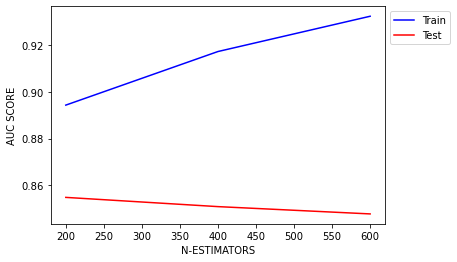

In [41]:
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators, train_result, 'b', label = 'Train')
line2 = plt.plot(n_estimators, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N-ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - As we saw as nos of estimators increased perfomance decreased.
    
    - We can check for n_estimators between 100-200 

Succussfully Completed 

Execution Time : 60.223893880844116


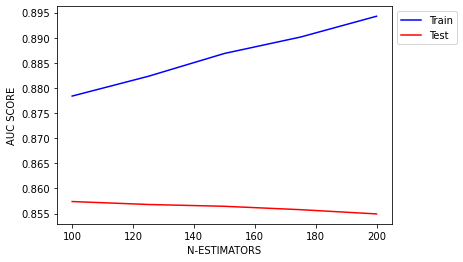

In [42]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

n_estimators = [100, 125, 150, 175, 200]

train_result = []
test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = xg.XGBClassifier(n_estimators = estimators,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(n_estimators, train_result, 'b', label = 'Train')
line2 = plt.plot(n_estimators, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N-ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We will finalize our n_estimator value = 100 for now.

<br>

#### `MAX_DEPTH - (default = 6)`

##### **NOTE** : _Increaing this value will make our model more complex and consume more memory_.

Succussfully Completed 

Execution Time : 29.319238901138306


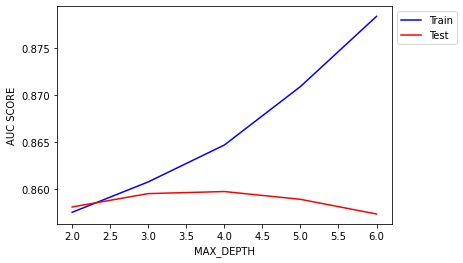

In [51]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

max_depth = [2,3,4,5,6]

train_result = []
test_result  = []

start_time = time.time()

for depth in max_depth:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = depth,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(max_depth, train_result, 'b', label = 'Train')
line2 = plt.plot(max_depth, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("MAX_DEPTH")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary : 
    
    We will finalize max_depth = 4

<br>

#### `LEARNING_RATE - (default = 0.3)`

Succussfully Completed 

Execution Time : 15.379207372665405


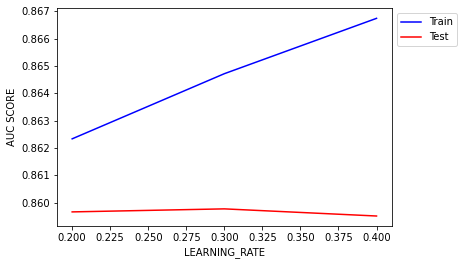

In [52]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

learning_rate = [0.2, 0.3, 0.4]

train_result = []
test_result  = []

start_time = time.time()

for rate in learning_rate:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = rate,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(learning_rate, train_result, 'b', label = 'Train')
line2 = plt.plot(learning_rate, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("LEARNING_RATE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary :
    
    - We will finalize eta (learning_rate) = 0.3

<br>

#### `BOOSTING_TYPE`

Succussfully Completed 

Execution Time : 18.041268348693848


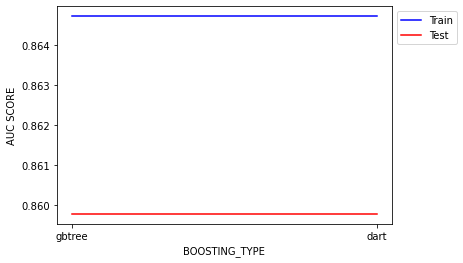

In [54]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

boosting_type = ['gbtree', 'dart']

train_result = []
test_result  = []

start_time = time.time()

for boost_type in boosting_type:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = boost_type,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(boosting_type, train_result, 'b', label = 'Train')
line2 = plt.plot(boosting_type, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("BOOSTING_TYPE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary : 
    
    - We can use default = 'gbtree'

<br>

#### `SUBSAMPLE`

Succussfully Completed 

Execution Time : 37.72279095649719


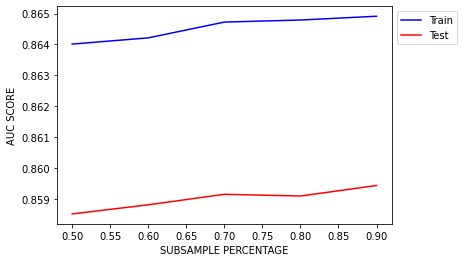

In [56]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

subsample = [0.5, 0.6, 0.7, 0.8, 0.9]

train_result = []
test_result  = []

start_time = time.time()

for sample in subsample:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = 'gbtree',
                           subsample = sample,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(subsample, train_result, 'b', label = 'Train')
line2 = plt.plot(subsample, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUBSAMPLE PERCENTAGE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We can finalize subsample = 0.9

<br>

#### `SCALE_POS_WEIGHT`

**REF** : https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [58]:
y_train.value_counts(normalize = True)

0    0.877361
1    0.122639
Name: Response, dtype: float64

In [63]:
import collections

# count examples in each class
counter = collections.Counter(y)

# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 7.159


Succussfully Completed 

Execution Time : 39.545149087905884


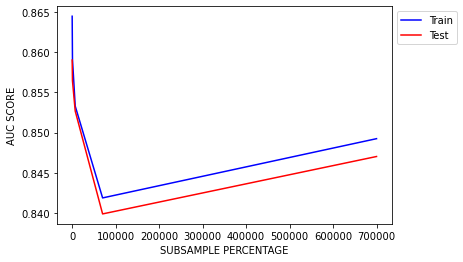

In [68]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

scale_weigths = [7.159, 700.159, 7000.159, 70000.159, 700000.159]

train_result = []
test_result  = []

start_time = time.time()

for each in scale_weigths:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = 'gbtree',
                           subsample = 0.9,
                           scale_pos_weight = each,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(scale_pos_weight, train_result, 'b', label = 'Train')
line2 = plt.plot(scale_pos_weight, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUBSAMPLE PERCENTAGE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We can between 0-100000 there is a steep decline in the AUC.
    
    - We can analyze for lesser scale_pos_Weight

Succussfully Completed 

Execution Time : 156.18959069252014


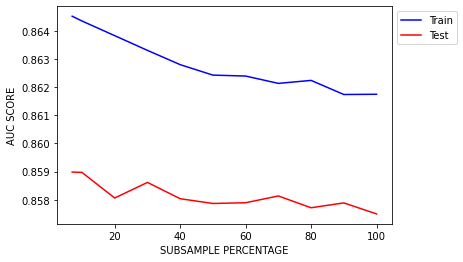

In [75]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

scale_weigths = [7, 10, 20, 30 , 40, 50, 60, 70, 80, 90, 100]

train_result = []
test_result  = []

start_time = time.time()

for each in scale_weigths:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = 'gbtree',
                           subsample = 0.9,
                           scale_pos_weight = each,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(scale_weigths, train_result, 'b', label = 'Train')
line2 = plt.plot(scale_weigths, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUBSAMPLE PERCENTAGE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Succussfully Completed 

Execution Time : 276.7113847732544


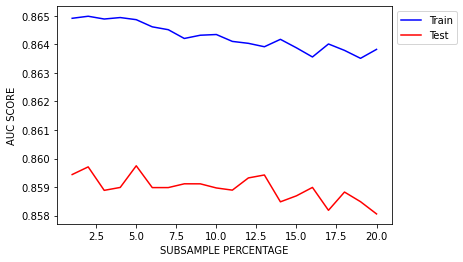

In [77]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

scale_weigths = np.linspace(1,20,20).astype('int')

train_result = []
test_result  = []

start_time = time.time()

for each in scale_weigths:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = 'gbtree',
                           subsample = 0.9,
                           scale_pos_weight = each,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(scale_weigths, train_result, 'b', label = 'Train')
line2 = plt.plot(scale_weigths, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUBSAMPLE PERCENTAGE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We will finalize our scale_pos_weight = 5

<br>

### `XGBOOST TUNED`

In [84]:
test_data.drop(columns = 'id',
               axis = 1,
               inplace = True)

In [94]:
import xgboost as xg
import time 

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 43)
scores   = []
predicts = []

start_time = time.time()
for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]


    # Initializing Model
    clf = xg.XGBClassifier(n_estimators = 200,
                           max_depth = 3,
                           learning_rate = 0.3,
                           booster = 'gbtree',
                           subsample = 0.9,
                           scale_pos_weight = 5)


    # Training the Ensemble Classifier
    clf.fit(X_train, y_train)

    # Predictions on valid Data
    y_pred = clf.predict(X_val)
    score  = roc_auc_score(y_pred, y_val)
    print(score)
    scores.append(score)
     
    
    predicts.append(clf.predict_proba(test_data)[:,1])
    
print("Avg", np.mean(scores))

end_time = time.time()
print("\n")
print("Execution Time : {}".format(end_time - start_time))

0.6421111764655199
0.6382193508931235
0.6397776055687455
0.6379030290022487
0.6400177649230515
0.6386795044173663
0.6386272397397555
0.6353643990517026
0.6397519874097435
0.6410177679586991
Avg 0.6391469825429956


Execution Time : 236.50371837615967


In [92]:
col = np.mean(predicts, 0)
col

array([4.3485994e-03, 7.1473318e-01, 6.7931724e-01, ..., 7.7562884e-04,
       5.0715753e-04, 4.9818708e-03], dtype=float32)

In [93]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = col
sample_submit.to_csv('sample_submission_XGBOOST_Tuned.csv', index = False)

Summary:
    
    - N_Estimators (100)  -> 0.857491901300129
    
    - N_Estimators (200)  -> 0.857708266757799
    
    - N_Estimators (500)  -> 0.856981177421187
    
    - We can conclude as the value of n_estimators goes high after 200 there is drop in AUC_ROC.

<br>

## `ENSEMBLE - CATBOOST,LIGHTGBM & XGBOOST`

In [95]:
train_data = pd.read_csv('train.csv')

test_data  = pd.read_csv('test.csv')

print("Data imported successfully")

Data imported successfully


In [96]:
categorical_col = ['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [97]:
# Converting Flot - Int (CATBOOST)

train_data['Region_Code'] = train_data['Region_Code'].astype('int64')
test_data['Region_Code']  = test_data['Region_Code'].astype('int64')

train_data['Policy_Sales_Channel'] = train_data['Region_Code'].astype('int64')
test_data['Policy_Sales_Channel']  = test_data['Policy_Sales_Channel'].astype('int64')

In [98]:
# Gender
train_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)

test_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)


# Vehicle Age
train_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)

test_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)


# Vehicle Damage
train_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

test_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

In [99]:
# Splitting Data - Independent and Dependent

X = train_data.drop(columns = ['id', 'Response'],
                    axis = 1)

y = train_data['Response']

In [100]:
test_data.drop(columns = ['id'],
               axis = 1,
               inplace = True)

<br>

In [ ]:
import lightgbm as lg
import catboost as cb
import xgboost as xg
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 43)
scores   = []
predicts = []

start_time = time.time()
for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    i = 1
    # Initializing Model
    model1 = cb.CatBoostClassifier(n_estimators = 500,
                                   max_depth = 5,
                                   random_state = 43,
                                   auto_class_weights = 'Balanced',
                                   cat_features = categorical_col,
                                   verbose = 0)

    model2 = lg.LGBMClassifier(n_estimators = 500,
                               max_depth = 5,
                               num_leaves = 20,
                               is_unbalance = True,
                               boosting_type = 'gbdt',
                               learning_rate = 0.05,
                               colsample_bytree = 0.6,
                               objective = 'binary',
                               n_jobs =-1,
                               random_state = 43)
    
    model3 = xg.XGBClassifier(n_estimators = 200,
                              max_depth = 3,
                              learning_rate = 0.3,
                              booster = 'gbtree',
                              subsample = 0.9,
                              scale_pos_weight = 5)
    
    
    clf = VotingClassifier(estimators = [('CATBOOST', model1), ('LIGHTGBM', model2), ('XGBOOST', model3)], 
                           voting='soft')


    # Training the Ensemble Classifier
    clf.fit(X_train, y_train)

    # Predictions on valid Data
    y_pred = clf.predict(X_val)
    score  = roc_auc_score(y_pred, y_val)
    print(score)
    scores.append(score)
     
    
    predicts.append(clf.predict_proba(test_data)[:,1])
    
print("Avg", np.mean(scores))

end_time = time.time()
print("\n")
print("Execution Time : {}".format(end_time - start_time))

0.6355337407725138
0.6334911738486266
0.6349982527118914
0.6318554022515039
0.6359029856900842
0.6333359505368923
0.6342186819888488
0.6305124109635817
0.6353768057184856


In [103]:
col = np.mean(predicts, 0)
col

array([0.00356657, 0.74903849, 0.71326284, ..., 0.0009849 , 0.00078634,
       0.00481097])

In [104]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = col
sample_submit.to_csv('sample_submission_ENSEMBLED.csv', index = False)

Summary:
    
    - AUC_ROC acheived when combining CATBOOST & LIGHTGBM            -> 0.849251704601147, Avg 0.6328588218461132
    
    - AUC_ROC acheived when combining CATBOOST< LIGHTGBM and XGBOOST -> 0.850602279647608, Avg 0.6340135188069497
    
    - Looks like ENSEMBLE is not working for this compitition.

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_tst, y_train, y_tst = train_test_split(X, y, test_size = 0.2,random_state = 43)
'''

In [ ]:
'''
import time 
from sklearn.model_selection import StratifiedKFold

max_depths =  np.linspace(1, 30, 10).astype('int')

train_result = []
test_result  = []
test_result2 = []

start_time = time.time()

kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 43)

for depth in max_depths:
    kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 43)
    train_scores   = []
    test_scores    = []
    test_scores2   = []
 
    for train_index, test_index in kfold.split(X_train, y_train):
        x_tr, x_val = X_train.iloc[train_index], X.iloc[test_index]
        y_tr, y_val = y_train.iloc[train_index], y.iloc[test_index]


    # Initializing Model
        clf = cb.CatBoostClassifier(n_estimators = 500,
                                   max_depth = depth,
                                   random_state = 43,
                                   auto_class_weights = 'Balanced',
                                   cat_features = categorical_col,
                                   verbose = 0)


        # Training the Ensemble Classifier
        clf.fit(x_tr, y_tr)

        
        train_pred = clf.predict_proba(x_tr)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_tr, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_scores.append(roc_auc)

        test_pred = clf.predict_proba(x_val)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_scores.append(roc_auc)
        
        test_pred2 = clf.predict_proba(X_tst)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_tst, test_pred2)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_scores2.append(roc_auc)
            
    train_result.append(np.mean(train_scores))
    test_result.append(np.mean(test_scores))
    test_result2.append(np.mean(test_scores2))
    
    print("Avg", np.mean(test_scores))
    
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))
'''

In [ ]:
'''
from sklearn.utils import class_weight
cw = class_weight.compute_class_weight('balanced',
                                             np.unique(y),
                                             y=y)
cw
'''